## Data Preprocessing
#### Importing the library

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* Pandas for preprocessing the file
* datetime library to convert date in string format into date to perform datetime opertation
* re for data cleaning
* stopwords to remove stopword from the string
* Porterstemming for stemming of words
* re for steming
* GaussianNB for gausian classifier
* confusion_matrix, roc_auc_score,classification_report, f1_score and accuracy_score for finding the accuracy and accuracy paradox
* SVC for kernal svm classifier
* LogisticRegression for logistic regression
* RandomForestClassifier for Random forest classifier
* LinearSVC for linear SVM classifier
* cross_val_score for k fold cross validation

In [53]:
import pandas as pd
from datetime import date
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random


#### Importing the dataset

In [2]:
dataset = pd.read_csv('data/Combined_News_DJIA.csv')

In [60]:
dataset.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

#### Creating copy of original dataset.

In [3]:
dataframe=dataset.copy()

In [23]:
dataframe["combined_news"] = dataframe.filter(regex=("Top.*")).apply(lambda x: ''.join(str(x.values)), axis=1)

In [61]:
dataframe.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news
0,2008-08-08,0,b georgia down two russian warplan countri mov...,b break musharraf impeach,b russia today column troop roll south ossetia...,b russian tank move toward capit south ossetia...,b afghan children rape impun u n offici say si...,b russian tank enter south ossetia whilst geor...,b break georgia invad south ossetia russia war...,b enemi combat trial noth sham salim haman sen...,...,b al qaeda face islamist backlash,b condoleezza rice us would act prevent isra s...,b busi day european union approv new sanction ...,b georgia withdraw soldier iraq help fight rus...,b pentagon think attack iran bad idea us news ...,b caucasu crisi georgia invad south ossetia,b indian shoe manufactori seri like work,b visitor suffer mental ill ban olymp,b help mexico kidnap surg,['b georgia down two russian warplan countri m...
1,2008-08-11,1,b wont america nato help us wont help us help ...,b bush put foot georgian conflict,b jewish georgian minist thank isra train fend...,b georgian armi flee disarray russian advanc g...,b olymp open ceremoni firework fake,b mossad fraudul new zealand passport iraq,b russia anger isra militari sale georgia,b american citizen live ossetia blame u georgi...,...,b believ tv neither russian georgian much victim,b riot still go montreal canada polic murder b...,b china overtak us largest manufactur,b war south ossetia pic,b isra physician group condemn state tortur,b russia beaten unit state head peak oil,b perhap question georgia russia conflict,b russia much better war,b come trade sex food,['b wont america nato help us wont help us hel...
2,2008-08-12,0,b rememb ador year old sang open ceremoni fake,b russia end georgia oper,b sexual harass would children,b al qa eda lose support iraq brutal crackdown...,b ceasefir georgia putin outmaneuv west,b microsoft intel tri kill xo laptop,b stratfor russo georgian war balanc power,b tri get sens whole georgia russia war vote t...,...,b russia respons georgia right,b gorbachev accus u make seriou blunder pursu ...,b russia georgia nato cold war two,b rememb ador year old led countri war base ev...,b war georgia isra connect,b sign point us encourag georgia invad south o...,b christoph king argu us nato behind georgian ...,b america new mexico,b bbc news asia pacif extinct man climat,['b rememb ador year old sang open ceremoni fa...
3,2008-08-13,0,b u refus israel weapon attack iran report,b presid order attack tskhinvali capit south o...,b israel clear troop kill reuter cameraman,b britain polici tough drug pointless say form...,b bodi year old found trunk latest ransom paid...,b china move million quak survivor prefab home,b bush announc oper get russia grill yeah end ...,b russian forc sink georgian ship,...,b us humanitarian mission soon georgia russia ...,b georgia ddo came us sourc,b russian convoy head georgia violat truce,b isra defenc minist us strike iran,b gorbachev choic,b wit russian forc head toward tbilisi breach ...,b quarter russian blame u conflict poll,b georgian presid say us militari take control...,b nobel laureat aleksand solzhenitsyn accus u ...,['b u refus israel weapon attack iran report'\...
4,2008-08-14,1,b expert admit legalis drug,b war south osetia pictur made russian soldier,b swedish wrestler ara abrahamian throw away m...,b russia exagger death toll south ossetia orig...,b missil kill insid pakistan may launch cia,b rushdi condemn random hous refus publish nov...,b poland us agre missl defens deal interest time,b russian conquer tblisi bet serious bet,...,b georgia confict could set back russia us rel...,b war caucasu much product american imperi dri...,b non media photo south ossetia georgia conflict,b georgian tv report shot russian sniper live ...,b saudi arabia mother move block child marriag,b taliban wage war humanitarian aid worker,b russia world forget georgia territori integr,b darfur rebel accus sudan

#### Using Steming and removing stopwords from the news and update dataframe with clean text

In [24]:
corpus = []
for i in range(0, len(dataset.index)):
    news = re.sub('[^a-zA-Z]', ' ',str( dataframe['combined_news'][i]))
    news = news.lower()
    news = news.split()
    ps = PorterStemmer()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news = ' '.join(news)
    corpus.append(news)

In [62]:
corpus

['b georgia two russian warplan countri move brink war b break musharraf impeach b russia today column troop roll south ossetia footag fight youtub b russian tank move toward capit south ossetia reportedli complet destroy georgian artilleri fire b afghan children rape impun u n offici say sick three year old rape noth b russian tank enter south ossetia whilst georgia shoot two russian jet b break georgia invad south ossetia russia warn would interven side b enemi combat trial noth sham salim haman sentenc year kept longer anyway feel like b georgian troop retreat osettain capit presum leav sever hundr peopl kill video b u prep georgia war russia b rice give green light israel attack iran say u veto isra militari op b announc class action lawsuit behalf american public fbi b russia georgia war nyt top stori open ceremoni olymp fuck disgrac yet proof declin journal b china tell bush stay countri affair b world war iii start today b georgia invad south ossetia russia get involv nato absor

# Model Building Training and Testing

#### Creating bag of words model

In [25]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

#### Now as we got matrix of feature X,  it's time to save dependent variable in different.

In [26]:
y = dataset.iloc[:, 1].values

#### Creating a date variable which will be used to divide training set and testing set and use this and use this variable to get number of records for training set.

In [27]:
training_end_date = date(2014,12,31)
num_training = len(dataframe[pd.to_datetime(dataframe["Date"]) <= training_end_date])

#### Creating training set to train our model and testing set to test our model

In [28]:
X_train = X[:num_training]
X_test = X[num_training:]
y_train = dataframe["Label"].values[:num_training]
y_test = dataframe["Label"].values[num_training:]

#### Apply all classification model to see which one is providing high accuracy

#### Fitting Naive Bayes to the Training set

In [46]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

#### Predicting the Test set results

In [47]:
y_pred = classifier.predict(X_test)

#### Printing confusion matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
#Printing confusion matrix
cm

array([[ 81, 105],
       [ 82, 110]], dtype=int64)

In [50]:
#printing accuracy rate
accuracy_score(y_test, y_pred)

0.50529100529100535

#### Fitting Kernal SVM to the Training set

In [37]:
classifier = SVC(probability=True, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Predicting the Test set results

In [45]:
y_pred = classifier.predict(X_test)

#### Printing confusion matrix

In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0, 186],
       [  0, 192]], dtype=int64)

In [ ]:
#printing accuracy rate
accuracy_score(y_test, y_pred)

#### Fitting Random Model to the Training set

In [14]:
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy',max_features='auto',max_depth=10)
classifier.fit(X_train, y_train)

#### Printing confusion Matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

Predicted,1
Actual,
0,186
1,192


In [ ]:
#printing accuracy rate
accuracy_score(y_test, y_pred)

In [16]:

print(X_train.shape)

(1611, 17048)


#### Check Precision and Recall

In [21]:
print (classification_report(y_test, y_pred))
print (accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       186
          1       0.51      1.00      0.67       192

avg / total       0.26      0.51      0.34       378

0.507936507937


C:\Users\nitin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### printing Graph for gausian classification

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

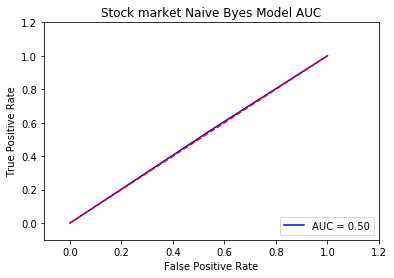

In [59]:
plt.title('Stock market Naive Byes Model AUC')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()